In [5]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [6]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
train_zip_path = '/content/drive/MyDrive/Colab Notebooks/Train.zip'


In [11]:
import zipfile

with zipfile.ZipFile(train_zip_path, 'r') as zip_ref:
    zip_ref.extractall('/content/train')



import os
import shutil

def flatten_dataset(root_path):
    nested_path = os.path.join(root_path, "Train")
    if os.path.exists(nested_path):
        for item in os.listdir(nested_path):
            src = os.path.join(nested_path, item)
            dst = os.path.join(root_path, item)
            if not os.path.exists(dst):
                shutil.move(src, dst)
            else:
                print(f"Skipped: {dst} already exists.")
        shutil.rmtree(nested_path)

flatten_dataset('/content/train')


print("Train folder contents:", os.listdir('/content/train'))

Train folder contents: ['Dangerous curve to the left', 'Traffic signals', 'Speed Limit 80', 'Keep right', 'End speed + passing limits', 'Speed Limit 30', 'Speed Limit 50', 'Wild animals crossing', 'No vechiles', 'Double curve', 'Speed Limit 70', 'Children crossing', 'Priority road', 'Keep left', 'End no passing veh  3.5 tons', 'Bicycles crossing', 'Speed Limit 120', 'Ahead only', 'No passing for vechiles over 3.5 metric tons', 'Go straight or left', 'Go straight or right', 'General caution', 'Right-of-way at the next intersection', 'Pedestrians', 'Turn left ahead', 'Beware of icesnow', 'Turn right ahead', 'No entry', 'Yield', 'Dangerous curve to the right', 'Bumpy road', 'End of Speed Limit 80', 'Vechiles over 3.5 metric tons prohibited', 'Speed Limit 100', 'Stop', 'Speed Limit 60', 'Roundabout mandatory', 'Speed Limit 20', 'Road work', 'Slippery road', 'End of no passing', 'No passing', 'Road narrows on the right']


In [ ]:
dataset_path = "/content/train"
image_size = (128, 128)
batch_size = 32
seed = 123

# Training set (80%)
training_set = tf.keras.utils.image_dataset_from_directory(
    dataset_path,
    validation_split=0.2,
    subset="training",
    seed=seed,
    labels="inferred",
    label_mode="categorical",
    image_size=image_size,
    batch_size=batch_size,
    shuffle=True
)

Found 39209 files belonging to 43 classes.
Using 31368 files for training.


In [ ]:
# Validation set (20%)
validation_set = tf.keras.utils.image_dataset_from_directory(
    dataset_path,
    validation_split=0.2,
    subset="validation",
    seed=seed,
    labels="inferred",
    label_mode="categorical",
    image_size=image_size,
    batch_size=batch_size,
    shuffle=True
)

Found 39209 files belonging to 43 classes.
Using 7841 files for validation.


In [ ]:
training_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 43), dtype=tf.float32, name=None))>

In [ ]:
for x,y in training_set:
    print(x, x.shape)
    print(y, y.shape)
    break

tf.Tensor(
[[[[ 32.         29.         35.       ]
   [ 32.         29.         35.       ]
   [ 32.65625    30.148438   36.96875  ]
   ...
   [ 19.835938   17.835938   21.835938 ]
   [ 20.         18.         22.       ]
   [ 20.         18.         22.       ]]

  [[ 32.         29.         35.       ]
   [ 32.         29.         35.       ]
   [ 32.65625    30.148438   36.96875  ]
   ...
   [ 19.835938   17.835938   21.835938 ]
   [ 20.         18.         22.       ]
   [ 20.         18.         22.       ]]

  [[ 31.59375    28.796875   35.203125 ]
   [ 31.59375    28.796875   35.203125 ]
   [ 32.1167     29.812012   37.0719   ]
   ...
   [ 19.835938   17.902588   22.275513 ]
   [ 20.         18.         22.40625  ]
   [ 20.         18.         22.40625  ]]

  ...

  [[ 24.984375   24.1875     28.59375  ]
   [ 24.984375   24.1875     28.59375  ]
   [ 24.558838   23.926025   28.988525 ]
   ...
   [ 22.969238   27.144775   28.382812 ]
   [ 23.         27.40625    28.21875  ]
   [ 

In [ ]:
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.models import Sequential

In [ ]:
model = Sequential()

In [ ]:
model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=(128, 128, 3)))
model.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

In [ ]:
model.add(Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=128, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

In [ ]:
model.add(Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=256, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

In [ ]:
model.add(Flatten())

In [ ]:
# Hidden Layer
model.add(Dense(units=1500, activation='relu'))

In [ ]:
# Output Layer
model.add(Dense(units=43, activation='softmax'))

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1500)           │    13,825,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 43)             │        64,543 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,062,299 (57.46 MB)

 Trainable params: 15,062,299 (57.46 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
training_history = model.fit(x=training_set, validation_data=validation_set, epochs=10)

Epoch 1/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 70s 61ms/step - accuracy: 0.6576 - loss: 1.5578 - val_accuracy: 0.9645 - val_loss: 0.1780
Epoch 2/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 47s 48ms/step - accuracy: 0.9833 - loss: 0.0800 - val_accuracy: 0.9856 - val_loss: 0.0837
Epoch 3/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 84s 51ms/step - accuracy: 0.9925 - loss: 0.0354 - val_accuracy: 0.9922 - val_loss: 0.0525
Epoch 4/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 49s 50ms/step - accuracy: 0.9919 - loss: 0.0389 - val_accuracy: 0.9923 - val_loss: 0.0546
Epoch 5/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 81s 49ms/step - accuracy: 0.9956 - loss: 0.0179 - val_accuracy: 0.9903 - val_loss: 0.0599
Epoch 6/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 48s 49ms/step - accuracy: 0.9960 - loss: 0.0201 - val_accuracy: 0.9957 - val_loss: 0.0410
Epoch 7/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 82s 48ms/step - accuracy: 0.9981 - loss: 0.0109 - val_accuracy: 0.9964 - val_loss: 0.0299
Epoch 8/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 82s 48ms/step - accuracy: 0.9980 - loss: 0.0163 - 

In [ ]:
#Model Evaluation on Training set
train_loss, train_acc = model.evaluate(training_set)

981/981 ━━━━━━━━━━━━━━━━━━━━ 15s 15ms/step - accuracy: 0.9999 - loss: 5.1125e-04


In [ ]:
print(train_loss, train_acc)

0.00031479483004659414 0.9999362230300903


In [ ]:
#Model on Validation set
val_loss, val_acc = model.evaluate(validation_set)

246/246 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.9963 - loss: 0.0243


In [ ]:
print(val_loss, val_acc)

0.029326610267162323 0.9960464239120483


In [ ]:
model.save("/content/drive/MyDrive/Colab Notebooks/trained_model.h5")

In [ ]:
training_history.history

{'accuracy': [0.8558722138404846,
  0.9859092235565186,
  0.9930821061134338,
  0.9939109683036804,
  0.9957600235939026,
  0.9960150718688965,
  0.9974177479743958,
  0.9982466101646423,
  0.9968758225440979,
  0.9976727962493896],
 'loss': [0.6205442547798157,
  0.06394880264997482,
  0.03238270431756973,
  0.030040806159377098,
  0.018541742116212845,
  0.019078660756349564,
  0.014591909013688564,
  0.009968642145395279,
  0.014916510321199894,
  0.011782623827457428],
 'val_accuracy': [0.9645453095436096,
  0.985588550567627,
  0.992220401763916,
  0.9923478960990906,
  0.9903073310852051,
  0.9956638216972351,
  0.9964290261268616,
  0.9932406544685364,
  0.9942609071731567,
  0.9960464239120483],
 'val_loss': [0.17799809575080872,
  0.08368130028247833,
  0.05246223136782646,
  0.054604362696409225,
  0.059937432408332825,
  0.04098276421427727,
  0.029926802963018417,
  0.04816196486353874,
  0.04052618891000748,
  0.02932661771774292]}

In [ ]:
# Recording History in json
import json
json_path = "/content/drive/MyDrive/Colab Notebooks/training_hist.json"
with open(json_path, "w") as f:
    json.dump(training_history.history, f)

In [ ]:
training_history.history["accuracy"]

[0.8558722138404846,
 0.9859092235565186,
 0.9930821061134338,
 0.9939109683036804,
 0.9957600235939026,
 0.9960150718688965,
 0.9974177479743958,
 0.9982466101646423,
 0.9968758225440979,
 0.9976727962493896]

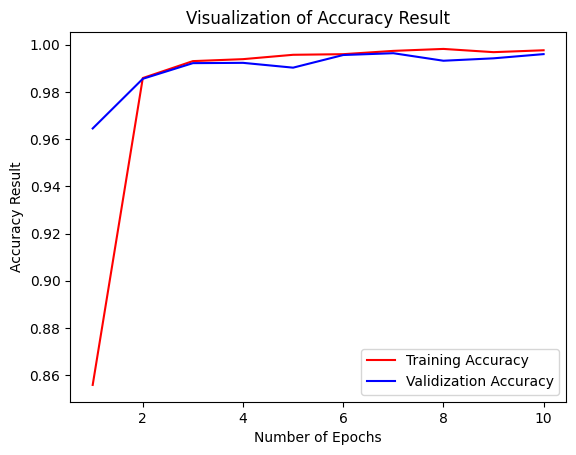

In [ ]:
epochs = [i for i in range(1, 11)]
plt.plot(epochs, training_history.history["accuracy"], color='red', label='Training Accuracy')
plt.plot(epochs, training_history.history["val_accuracy"], color='blue', label='Validization Accuracy')
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy Result")
plt.title("Visualization of Accuracy Result")
plt.legend()
plt.show()

In [ ]:
class_name = validation_set.class_names
class_name

['Ahead only',
 'Beware of icesnow',
 'Bicycles crossing',
 'Bumpy road',
 'Children crossing',
 'Dangerous curve to the left',
 'Dangerous curve to the right',
 'Double curve',
 'End no passing veh  3.5 tons',
 'End of Speed Limit 80',
 'End of no passing',
 'End speed + passing limits',
 'General caution',
 'Go straight or left',
 'Go straight or right',
 'Keep left',
 'Keep right',
 'No entry',
 'No passing',
 'No passing for vechiles over 3.5 metric tons',
 'No vechiles',
 'Pedestrians',
 'Priority road',
 'Right-of-way at the next intersection',
 'Road narrows on the right',
 'Road work',
 'Roundabout mandatory',
 'Slippery road',
 'Speed Limit 100',
 'Speed Limit 120',
 'Speed Limit 20',
 'Speed Limit 30',
 'Speed Limit 50',
 'Speed Limit 60',
 'Speed Limit 70',
 'Speed Limit 80',
 'Stop',
 'Traffic signals',
 'Turn left ahead',
 'Turn right ahead',
 'Vechiles over 3.5 metric tons prohibited',
 'Wild animals crossing',
 'Yield']